### 1. Load History OHCLV 

Download-data: 
`
freqtrade download-data --config user_data/config.json --timeframe 15m --timerange 20240101-20250101
`

File-like:
`
BTC_USDT-15m.feather
`


In [1]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')

file_path = '../freqtrade-grid/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)

### 2. Pair Filter

In [2]:
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]

top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

import random
random200 = random.sample(coins, 200)

target_coins = top200

### 3. Load History OHLCV 

In [3]:
def extract_coin_data(directory):
    coin_list = {}
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                if len(df) > 0 :
                    coin_list[coin_symbol] = df
                    symbols.append(coin_symbol)
    
    return coin_list,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)

### 3. History Data Transform

In [4]:
import pandas as pd
close_dfs = []
open_dfs = []
high_dfs = []
low_dfs = []
volume_dfs = []


for symbol, df in coins.items():
    
    temp_df = df[['date', 'close']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    close_dfs.append(temp_df)



    temp_df = df[['date', 'open']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    open_dfs.append(temp_df)


    temp_df = df[['date', 'high']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    high_dfs.append(temp_df)
    

    temp_df = df[['date', 'low']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    low_dfs.append(temp_df)

    temp_df = df[['date', 'volume']].copy()
    temp_df['date'] = pd.to_datetime(temp_df['date'])
    temp_df = temp_df.set_index('date')  # 将date设为索引
    # temp_df.index = temp_df.index.tz_localize(None)
    temp_df.columns = [symbol]  
    volume_dfs.append(temp_df)



close = pd.concat(close_dfs, axis=1)
open = pd.concat(open_dfs, axis=1)
high = pd.concat(high_dfs, axis=1)
low = pd.concat(low_dfs, axis=1)
volume = pd.concat(volume_dfs, axis=1)
amount = close.mul(volume, fill_value=1)
vwap = (high + low + close + open) / 4
return_ = close.pct_change()


### 4. OHLCV Filter

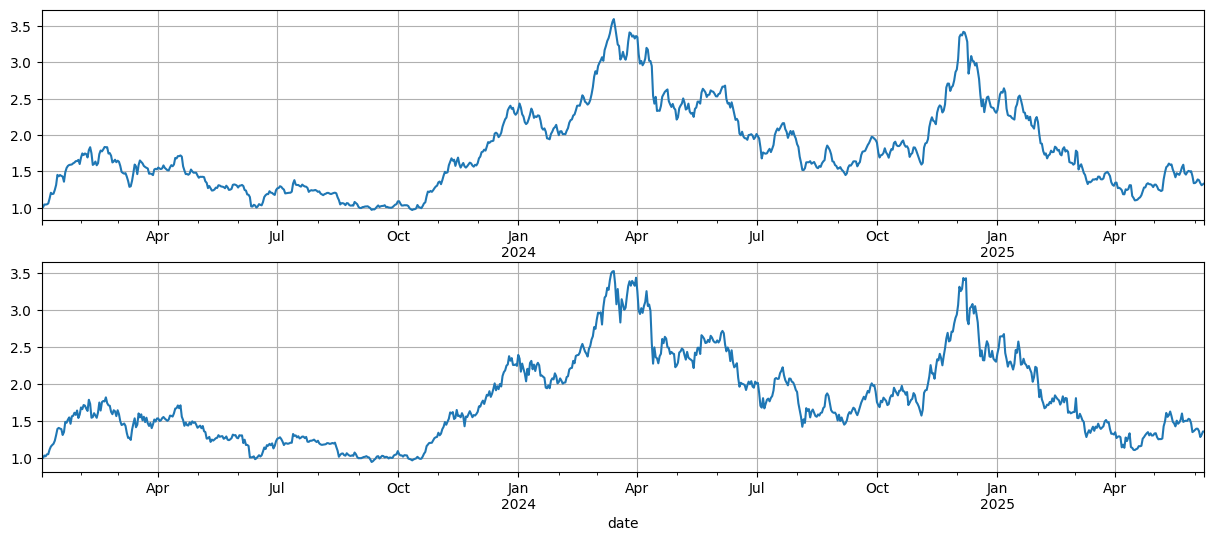

In [5]:
start_time = '2023-01-01'
end_time = '2025-06-09'
close_filter = close[(close.index > start_time) & (close.index < end_time)]
open_filter = open[(open.index > start_time) & (open.index < end_time)]
high_filter = high[(high.index > start_time) & (high.index < end_time)]
low_filter = low[(low.index > start_time) & (low.index < end_time)]
volume_filter = volume[(volume.index > start_time) & (volume.index < end_time)]
amount_filter = amount[(amount.index > start_time) & (amount.index < end_time)]
vwap_filter = vwap[(vwap.index > start_time) & (vwap.index < end_time)]
return_filter = return_[(return_.index > start_time) & (return_.index < end_time)]

import matplotlib.pyplot as plt
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
high_norm = high_filter/high_filter.bfill().iloc[0] 
close_norm = close_filter/close_filter.bfill().iloc[0] 
high_norm.mean(axis=1).plot(ax=ax1, figsize=(15,6),grid=True)
close_norm.mean(axis=1).plot(ax=ax2, figsize=(15,6),grid=True);

### 5. Define Factor

<Axes: xlabel='date'>

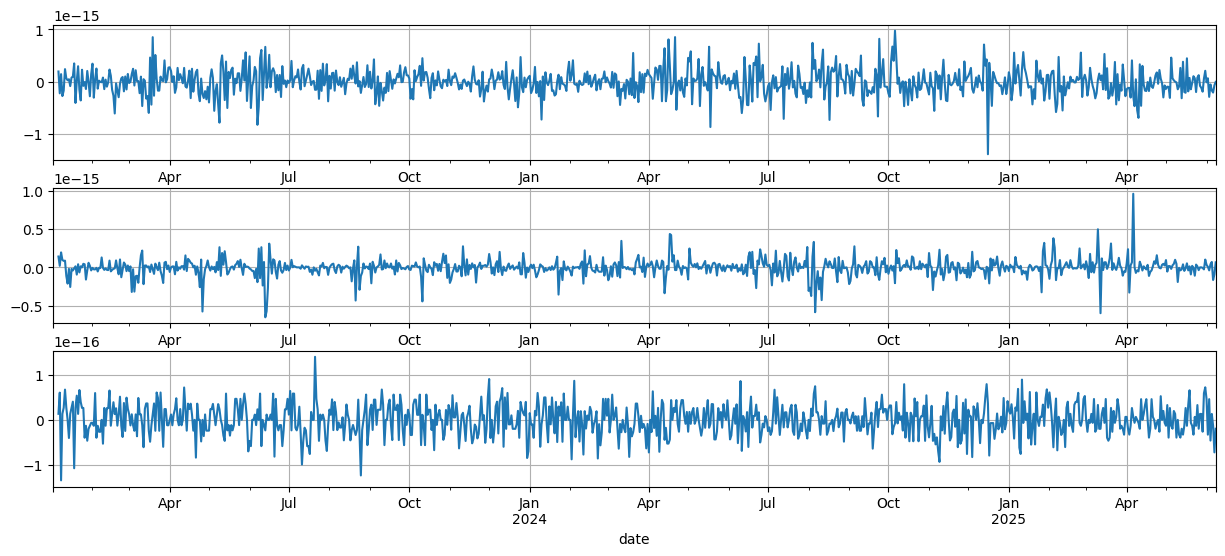

In [6]:
# 波动率
volatility = return_filter.rolling(window=10, min_periods=5).std()
# 动量
momentum = return_filter.rolling(window=10, min_periods=5).apply(lambda y: (1+y).prod()-1)
# 规模
size = amount_filter.rolling(window=10, min_periods=5).mean()

def normalize_df(df):
    """按行进行Z-Score归一化，处理标准差为0的情况"""
    row_means = df.mean(axis=1)
    row_stds = df.std(axis=1)
    row_stds[row_stds == 0] = 1  # 处理标准差为0的情况
    return df.sub(row_means, axis=0).div(row_stds, axis=0)

import matplotlib.pyplot as plt
_, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))
normalize_df(volatility).mean(axis=1).plot(ax=ax1, figsize=(15,6),grid=True)
normalize_df(momentum).mean(axis=1).plot(ax=ax2, figsize=(15,6),grid=True)
normalize_df(size).mean(axis=1).plot(ax=ax3, figsize=(15,6),grid=True)

### 6. AlphaLens Data Adaptor

In [23]:
single_alpha = volatility
# single_alpha = momentum

# 将因子转换为Alphalens需要的MultiIndex格式
factor = single_alpha.stack()
factor.index.names = ['date', 'asset']
factor = factor.dropna()  # 清理缺失值
price = close_filter

In [24]:
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    factor=factor,
    prices=price,
    periods=(1,),
    quantiles=10
)
factor_data

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D    factor  \
date                      asset                                  
2023-01-06 00:00:00+00:00 AVAX/USDT:USDT   -0.002718  0.032537   
                          QTUM/USDT:USDT    0.001019  0.017190   
                          DASH/USDT:USDT    0.011135  0.036156   
                          CHZ/USDT:USDT    -0.012186  0.033663   
                          FLOW/USDT:USDT   -0.001429  0.044010   
...                                              ...       ...   
2025-06-07 00:00:00+00:00 PENDLE/USDT:USDT -0.010768  0.040071   
                          TRX/USDT:USDT    -0.017961  0.018999   
                          PYTH/USDT:USDT   -0.004337  0.056084   
                          BLUR/USDT:USDT   -0.009519  0.046359   
                          SFP/USDT:USDT    -0.006907  0.037535   

                                            factor_quantile  
date                      asset                              
2023-01-06 00:00:00+00:00 AVAX/USDT:USDT                  8  
                          QTUM/USDT:USDT                  3  
                          DASH/USDT:USDT                  8  
                          CHZ/USDT:USDT                   8  
                          FLOW/USDT:USDT                  9  
...                                                     ...  
2025-06-07 00:00:00+00:00 PENDLE/USDT:USDT                3  
                          TRX/USDT:USDT                   1  
                          PYTH/USDT:USDT                  7  
                          BLUR/USDT:USDT                  5  
                          SFP/USDT:USDT                   2  

[87082 rows x 3 columns]

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.002845,0.065042,0.024149,0.010262,9101,10.451069
2,0.007216,0.071318,0.032215,0.011922,8693,9.982545
3,0.009044,0.076334,0.036030,0.012682,8565,9.835557
4,0.010702,0.078731,0.039165,0.013357,8705,9.996325
5,0.012007,0.084700,0.042371,0.013954,8712,10.004364
6,0.013853,0.087369,0.045692,0.014545,8482,9.740245
7,0.015137,0.097719,0.049896,0.015271,8552,9.820629
8,0.017504,0.105257,0.055417,0.016411,8718,10.011254
9,0.020973,0.131915,0.065425,0.019028,8544,9.811442


Returns Analysis


,1D
Ann. alpha,0.260
beta,0.199
Mean Period Wise Return Top Quantile (bps),20.515
Mean Period Wise Return Bottom Quantile (bps),-2.392
Mean Period Wise Spread (bps),22.908


<Figure size 1200x600 with 0 Axes>

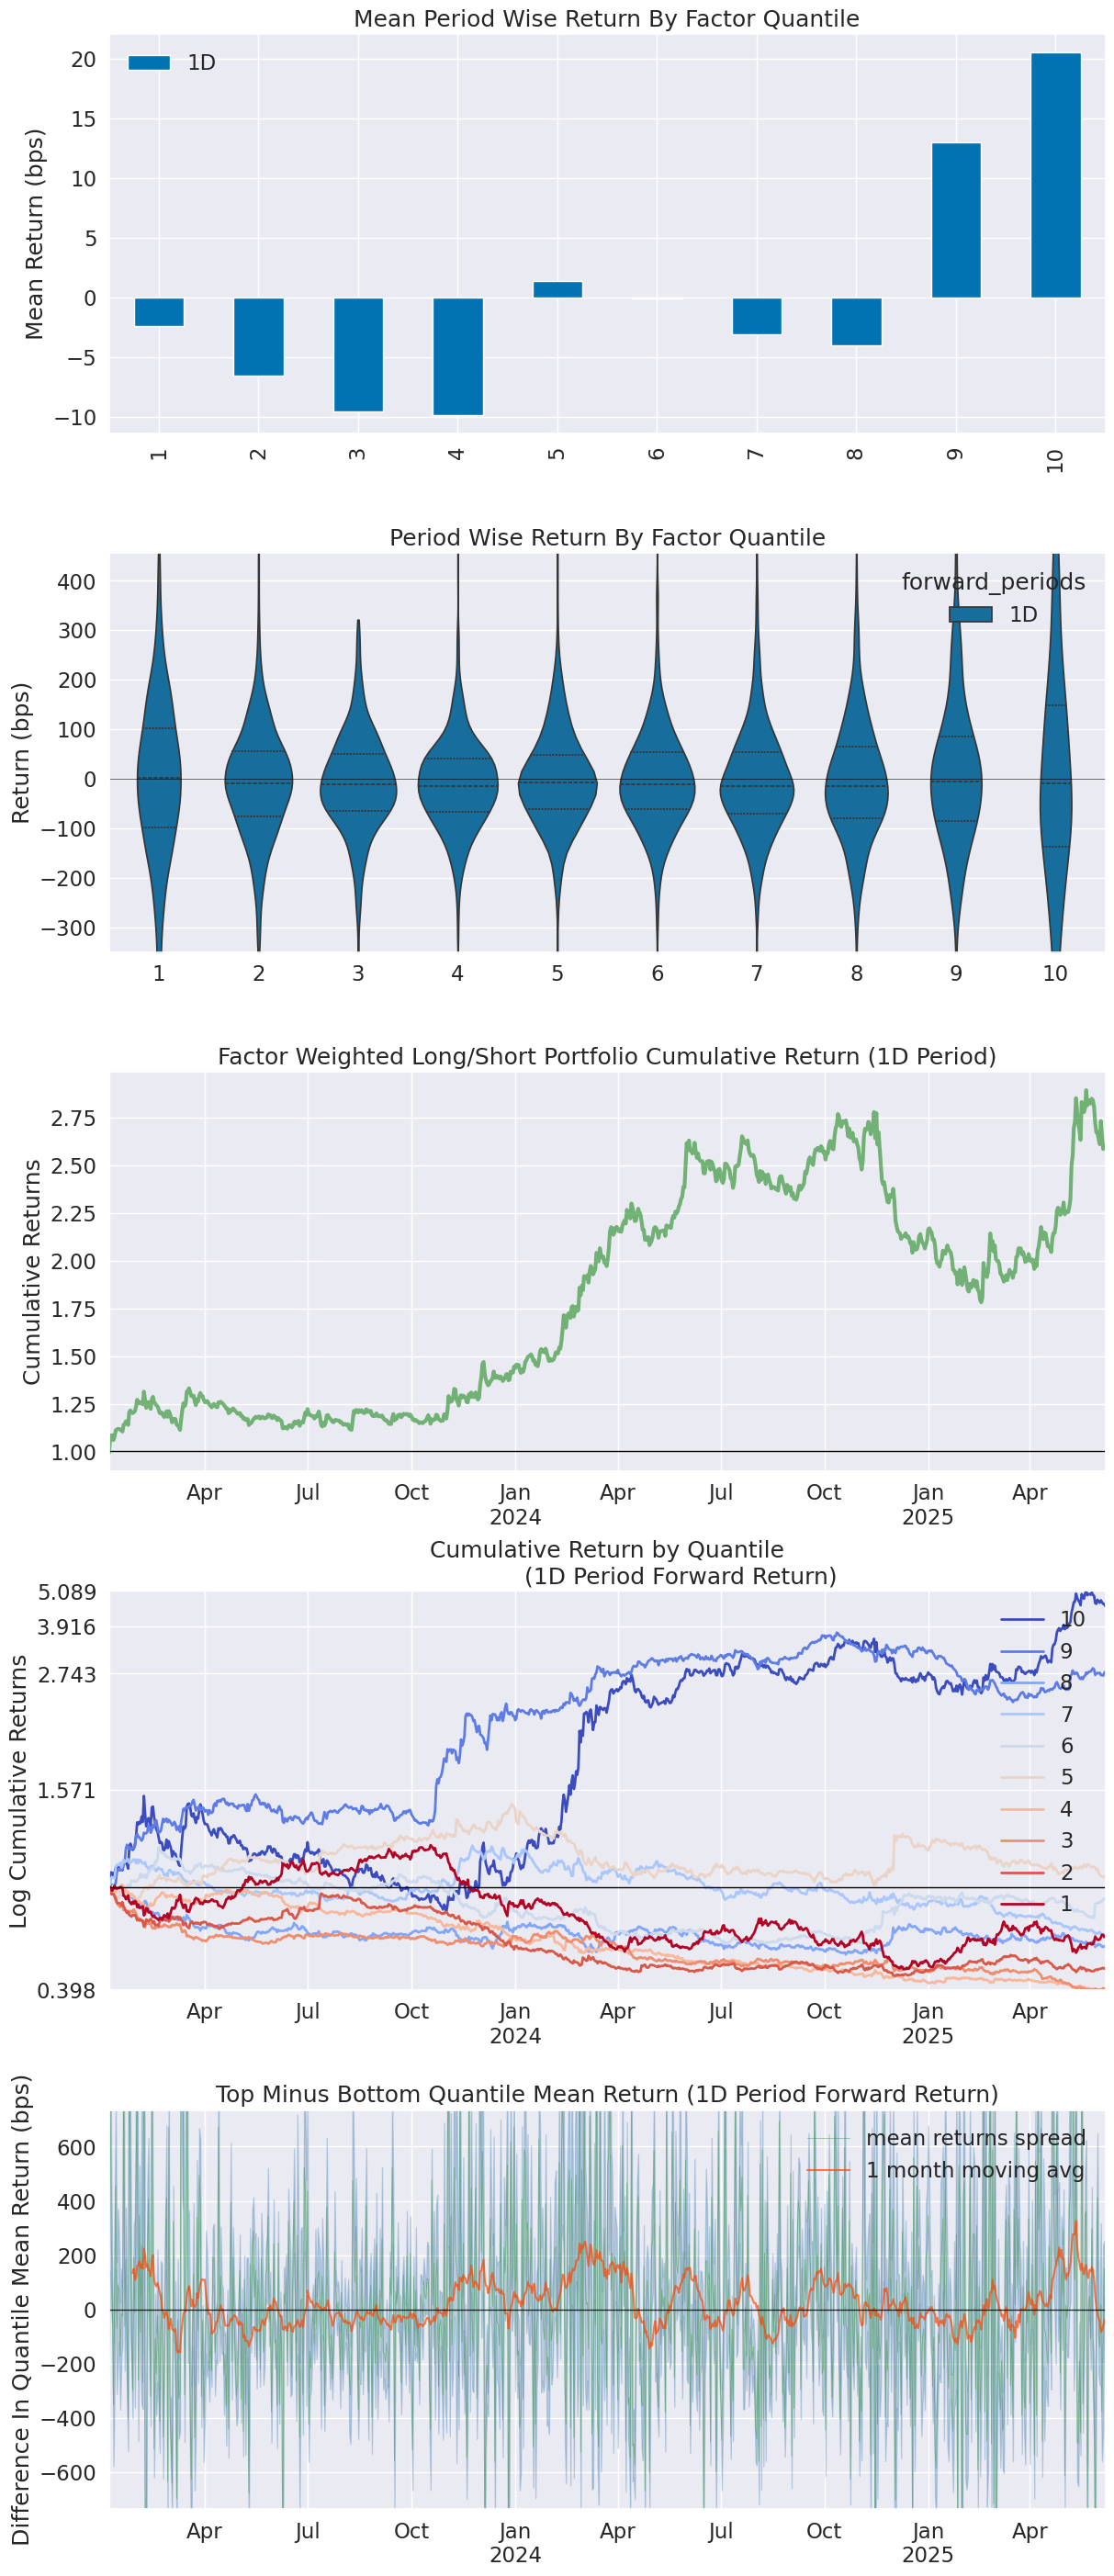

Information Analysis


,1D
IC Mean,-0.061
IC Std.,0.253
Risk-Adjusted IC,-0.241
t-stat(IC),-7.174
p-value(IC),0.000
IC Skew,0.148
IC Kurtosis,-0.366


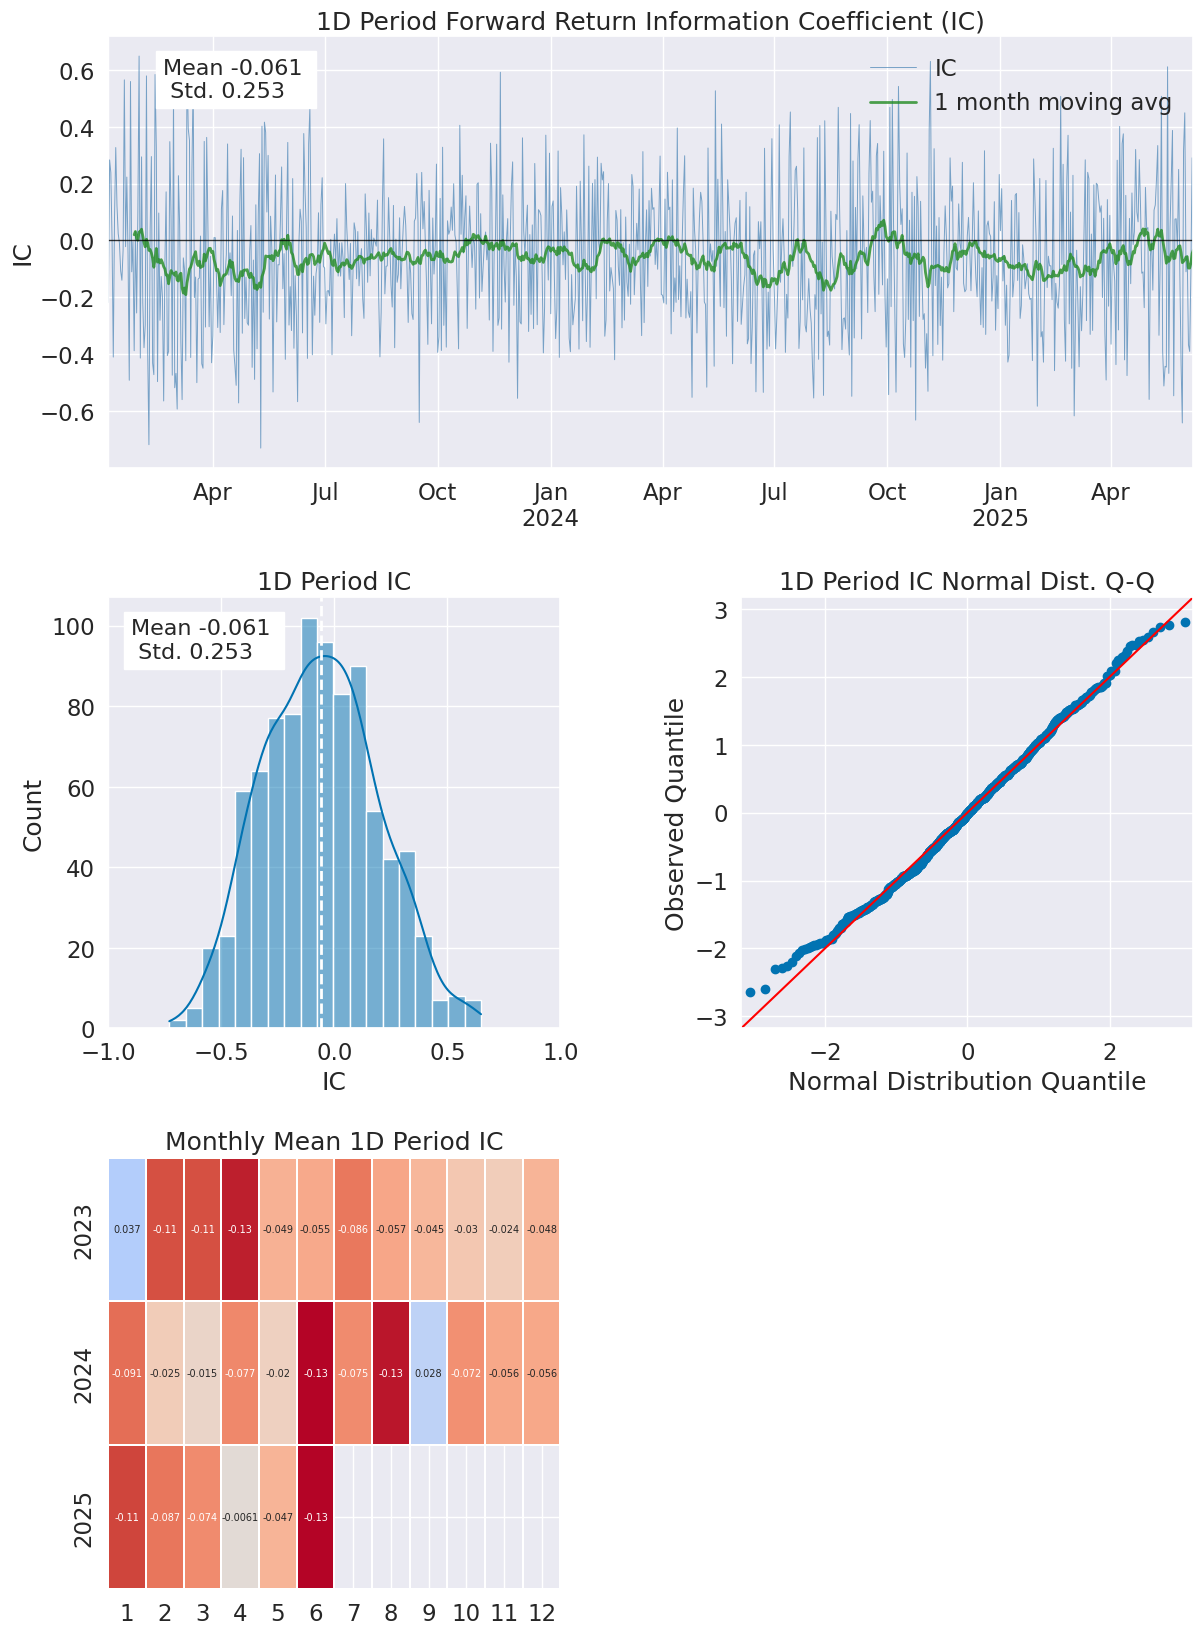

Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.181
Quantile 2 Mean Turnover,0.393
Quantile 3 Mean Turnover,0.480
Quantile 4 Mean Turnover,0.517
Quantile 5 Mean Turnover,0.529
Quantile 6 Mean Turnover,0.520
Quantile 7 Mean Turnover,0.492
Quantile 8 Mean Turnover,0.422
Quantile 9 Mean Turnover,0.323
Quantile 10 Mean Turnover,0.147


,1D
Mean Factor Rank Autocorrelation,0.943


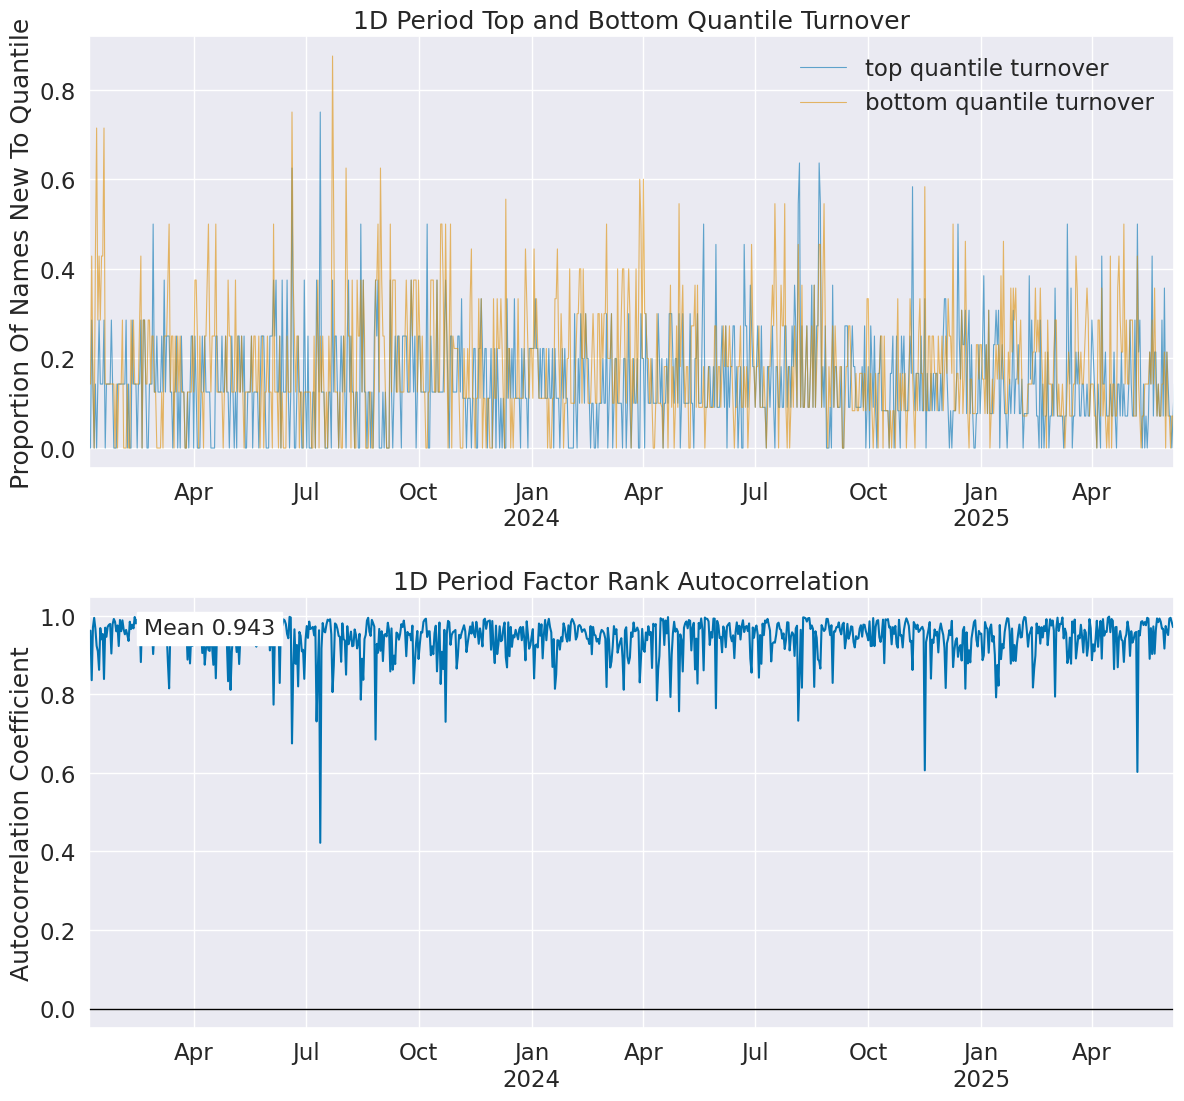

In [28]:
alphalens.tears.create_full_tear_sheet(
    factor_data,
    long_short=True,
)